In [13]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import plotly.express as px

df = pd.read_csv('../hanro_test/0408/06_Data.csv')
print(df.shape)
df.head(2)

(36833, 15)


Unnamed: 0          날짜  SKU ID            SKU 명            바코드 발주가능상태  \
0           0  2019-05-16   29349    리큐진한겔일반 3LNEW  8801046893111   발주가능   
1           1  2019-05-16   29350  리큐 진한겔드럼 3L NEW  8801046893128   발주가능   

   입고수량  쿠팡출고수량  쿠팡현재재고수량     자재번호                  자재명  카테고리  입수   출고수량  \
0   384     287      5788  6077374  19리큐 진한겔 알카2.7용기(일)  세탁세제   4  71.75   
1     0     235      2772  6077394  19리큐 진한겔 알카2.7용기(드)  세탁세제   4  58.75   

        재고수량  
0  80.668990  
1  47.182979

In [16]:
# 1. 2019년 5월 대비 8월의 "쿠팡출고수량"이 몇 퍼센트 증가했는지 계산하시오.

df['date'] = pd.to_datetime(df['날짜'])
df['month'] = df['date'].dt.month
p1 = df.pivot_table(index = 'month', values = '쿠팡출고수량', aggfunc = 'sum').T # T : 전치행렬
(p1[5] - p1[8]) / p1[5]

쿠팡출고수량    0.532564
dtype: float64

In [18]:
# 2. 각 카테고리 별 5월 대비 8월의 "쿠팡출고수량"의 증감율을 계산하시오.

p2 = df.pivot_table(index = '카테고리', columns = 'month', values = '쿠팡출고수량', aggfunc = 'sum')
(p2[5] - p2[8]) / p2[5]

카테고리
F&B      0.581838
ST       0.338657
기타       0.469338
덴탈케어     0.587224
매입브랜드    0.641040
세탁세제     0.501493
주방세제     0.468164
헤어케어     0.547451
dtype: float64

In [20]:
# 3. '발주가능상태'에서 '발주중단' 된 데이터의 특성을 파악하고자 한다. '발주중단' 데이터만 추출하여, 
# 카테고리의 빈도수를 확인하고, 연속형 자료의 기술통계량을 계산하시오.

cond = df['발주가능상태'] == '발주중단'
print(df.loc[cond]['카테고리'].value_counts())
df.loc[cond].describe()

카테고리
헤어케어    78
세탁세제    14
덴탈케어     3
Name: count, dtype: int64


Unnamed: 0        SKU ID        입고수량      쿠팡출고수량     쿠팡현재재고수량  \
count     95.000000  9.500000e+01   95.000000   95.000000    95.000000   
mean   28616.242105  3.559700e+06   14.357895   10.989474   516.526316   
min    15576.000000  3.097770e+05    0.000000    0.000000     0.000000   
25%    26683.000000  2.383418e+06    0.000000    2.000000    20.500000   
50%    29684.000000  3.367647e+06    0.000000    8.000000   164.000000   
75%    31374.500000  3.367649e+06    0.000000   14.500000   246.000000   
max    36563.000000  1.023964e+07  216.000000  100.000000  3077.000000   
std     4672.622153  2.659679e+06   40.203714   14.443945   938.434514   

               자재번호         입수       출고수량         재고수량                 date  \
count  9.500000e+01  95.000000  95.000000    95.000000                   95   
mean   6.038457e+06   7.515789   2.095614   318.160424  2019-07-15 00:00:00   
min    5.008395e+06   4.000000   0.000000     0.000000  2019-06-18 00:00:00   
25%    6.068195e+06   4.000000   0.200000    43.036364  2019-07-09 12:00:00   
50%    6.075507e+06  10.000000   0.800000   210.000000  2019-07-15 00:00:00   
75%    6.075508e+06  10.000000   3.375000   379.307692  2019-07-21 00:00:00   
max    6.075508e+06  10.000000  16.666667  2080.000000  2019-08-07 00:00:00   
std    1.870319e+05   2.763220   2.906945   399.025974                  NaN   

           month  
count  95.000000  
mean    7.000000  
min     6.000000  
25%     7.000000  
50%     7.000000  
75%     7.000000  
max     8.000000  
std     0.461266

In [27]:
# 4. 19년도 7월 2번째 주에 '쿠팡출고수량'이 가장 많은 '카테고리'는 무엇인지 확인하시오.

df['week'] = df['date'].dt.isocalendar().week
cond = df['month'] == 7
print(df.loc[cond]['week'].unique())
cond2 = df['week'] == 28
df.loc[cond2].pivot_table(index = '카테고리', values = '쿠팡출고수량', aggfunc = 'sum').sort_values(by = '쿠팡출고수량', ascending = False).index[0]

<IntegerArray>
[27, 28, 29, 30, 31]
Length: 5, dtype: UInt32


'세탁세제'

In [31]:
# 5. 각 '자재명' 별 '쿠팡출고수량', '입고수량'의 평균을 계산하고, 계산된 결과에서 
# '쿠팡출고수량'의 상위 10% '자재명'을 'A' / 상위 30%를 'B' / 상위 60%를 'C' / 나머지를 'D'로 
# '등급분류'라는 파생변수를 생성하고, 각 등급에서 가장 많이 등장한 '카테고리'항목이 무엇인지 확인하시오.

p3 = df.pivot_table(index = ['자재명', '카테고리'], values = ['쿠팡출고수량', '입고수량'], aggfunc = 'mean').reset_index()
a = p3['쿠팡출고수량'] >= p3['쿠팡출고수량'].quantile(0.9)
b = p3['쿠팡출고수량'] >= p3['쿠팡출고수량'].quantile(0.7)
c = p3['쿠팡출고수량'] >= p3['쿠팡출고수량'].quantile(0.6)

p3['등급분류'] = 'D'
p3.loc[c, '등급분류'] = 'C'
p3.loc[b, '등급분류'] = 'B'
p3.loc[a, '등급분류'] = 'A'

pd.crosstab(p3['등급분류'], p3['카테고리'])


카테고리  F&B  ST  기타  덴탈케어  매입브랜드  세탁세제  주방세제  헤어케어
등급분류                                            
A       3   0   0     8      0     9     8     8
B       9   0   2    15      1    23    11     9
C       2   4   0    10      1    14     2     3
D      18  38   3    36      4    54    14    45

In [34]:
# 6. '카테고리'를 사용자로부터 입력받아, '발주가능상태'에 따른 '월'(날짜로 부터 계산) 별 '쿠팡출고수량'의 합을 
# 계산하여 시각화 하고 해당 그래프를 '카테고리명_월별_쿠팡출고량.png'파일 형태로 저장하는 함수를 만드시오.

cond = df['카테고리'] == '세탁세제'
p4 = df.loc[cond].pivot_table(index = ['발주가능상태', 'month'], values = '쿠팡출고수량', aggfunc = 'sum').reset_index()
img = px.bar(p4, x = 'month', y = '쿠팡출고수량', color = '발주가능상태')
img.write_html('세탁세제.html')

<Axes: xlabel='month', ylabel='쿠팡출고수량'>

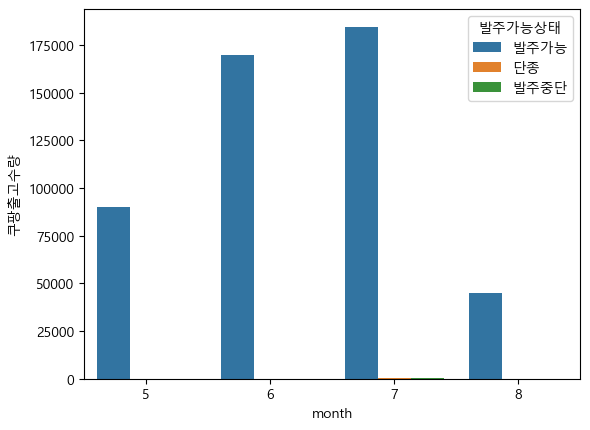

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family = 'Malgun Gothic')
sns.barplot(data = p4, x = 'month', y = '쿠팡출고수량', hue = '발주가능상태')

In [38]:
# 7. '카테고리'빈도수가 가장 많은 항목의 '입고수량'이 높은 상위 100개 데이터를 result_category.xlsx로 저장하시오.

name = df['카테고리'].value_counts().index[0]
cond = df['카테고리'] == name
df.loc[cond].sort_values(by = '입고수량', ascending = False).head(100)

Unnamed: 0          날짜   SKU ID                                 SKU 명  \
8672         8672  2019-06-03  3031368     Box_리큐 진한겔 액체세제 일반용 리필형 2.1L * 4입   
23694       23694  2019-07-04  3031368     Box_리큐 진한겔 액체세제 일반용 리필형 2.1L * 4입   
26242       26242  2019-07-09  3031368     Box_리큐 진한겔 액체세제 일반용 리필형 2.1L * 4입   
31987       31987  2019-07-23  3031368     Box_리큐 진한겔 액체세제 일반용 리필형 2.1L * 4입   
34400       34400  2019-07-31  3031368     Box_리큐 진한겔 액체세제 일반용 리필형 2.1L * 4입   
...           ...         ...      ...                                   ...   
34418       34418  2019-07-31  3264275               Box_울샴푸 오리지널 리필형 1.5L*4   
10626       10626  2019-06-07   489752  Box_스파크 7.5kg(리필)x2입(한박스) 7.5kg  2개입   
87             87  2019-05-16  3031369     Box_리큐 진한겔 액체세제 드럼용 리필형 2.1L * 4입   
23802       23802  2019-07-04  9236805               Pack_리큐 진한겔 2.1+2.1(일반)   
8599         8599  2019-06-03    34402                     울샴푸오리지널 4160ml 용기   

                  바코드 발주가능상태  입고수량  쿠팡출고수량  쿠팡현재재고수량     자재번호  \
8672   18801046294762   발주가능  9777    1230     21562  6067098   
23694  18801046294762   발주가능  9539     821     16117  6067098   
26242  18801046294762   발주가능  9533    1060     19727  6067098   
31987  18801046294762   발주가능  9488     833     28578  6067098   
34400  18801046294762   발주가능  9480     563     32950  6067098   
...               ...    ...   ...     ...       ...      ...   
34418  18801046297503   발주가능  1176     168      1758  6067119   
10626  18801046260873   발주가능  1158       8      1273  6067053   
87     18801046294779   발주가능  1140     331      8129  6066844   
23802   8801046318690   발주가능  1137     173      1610  6068208   
8599    8801046878996   발주가능  1136     287      5355  6068101   

                              자재명  카테고리  입수        출고수량        재고수량  \
8672        17리큐 진한겔 2.1L온라인4입(화)  세탁세제   4  307.500000   70.120325   
23694       17리큐 진한겔 2.1L온라인4입(화)  세탁세제   4  205.250000   78.523752   
26242       17리큐 진한겔 2.1L온라인4입(화)  세탁세제   4  265.000000   74.441509   
31987       17리큐 진한겔 2.1L온라인4입(화)  세탁세제   4  208.250000  137.229292   
34400       17리큐 진한겔 2.1L온라인4입(화)  세탁세제   4  140.750000  234.103020   
...                           ...   ...  ..         ...         ...   
34418   18울샴푸오리지 1.5L*4 (온라인) (화)  세탁세제   4   42.000000   41.857143   
10626         18스파크 리필 7.5kg(온라인)  세탁세제   2    4.000000  318.250000   
87     17리큐 진한겔드럼용 2.1L리필(온4입)(화)  세탁세제   4   82.750000   98.235650   
23802    18리큐 진한겔 2.1+2.1(일반)(온)화  세탁세제   3   57.666667   27.919075   
8599     18울샴푸오리지 4160mL 용기(화)-수정  세탁세제   4   71.750000   74.634146   

            date  month  week  
8672  2019-06-03      6    23  
23694 2019-07-04      7    27  
26242 2019-07-09      7    28  
31987 2019-07-23      7    30  
34400 2019-07-31      7    31  
...          ...    ...   ...  
34418 2019-07-31      7    31  
10626 2019-06-07      6    23  
87    2019-05-16      5    20  
23802 2019-07-04      7    27  
8599  2019-06-03      6    23  

[100 rows x 18 columns]

In [42]:
# 8. 각 '카테고리'별 ‘쿠팡출고수량’의 7월과 8월의 '평균'과 '합'의 차이를 계산하시오.

p5 = df.pivot_table(index = '카테고리', values = '쿠팡출고수량', columns = 'month', aggfunc = ['sum', 'mean'])

print(p5['sum'][5] - p5['sum'][8])
print(p5['mean'][5] - p5['mean'][8])

카테고리
F&B      13782
ST         827
기타         773
덴탈케어     43619
매입브랜드     1134
세탁세제     45179
주방세제     21558
헤어케어     33948
dtype: int64
카테고리
F&B     -16.601402
ST       -7.809156
기타       -5.118382
덴탈케어    -38.077835
매입브랜드    -2.890214
세탁세제     -8.700467
주방세제    -41.026813
헤어케어    -24.781557
dtype: float64


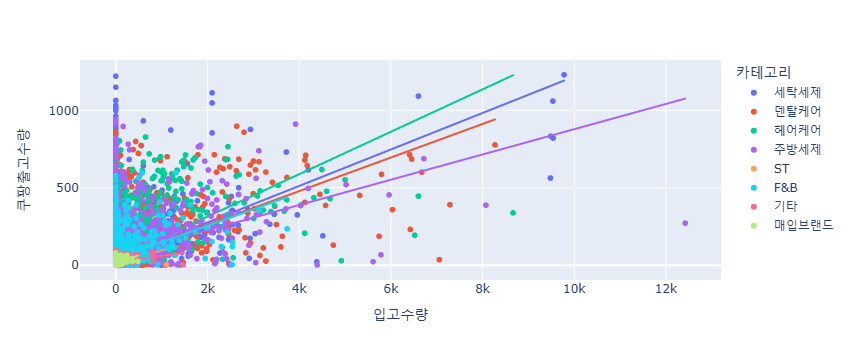

In [44]:
# 9. '입고수량'과 '쿠팡출고수량'의 상관관계를 산점도를 이용해 시각화 하시오.

px.scatter(df, x = '입고수량', y = '쿠팡출고수량', color = '카테고리', trendline = 'ols')
# trendline : 데이터를 대표하는 회귀선 출력 (ols : ordinary linear square)
# R² (설명 계수) : 해당 회귀선이 데이터를 얼마나 잘 대표하고 잇는가? (0 ~ 1)

In [59]:
# 10. 제품명(SKU 명)으로부터 각 제품의 용량을 추출하여, '용량'이라는 이름의 파생 변수를 생성하시오.
# - 예시 :
# - '울샴푸아웃도어 800ml 용기' -> 800
# - '리큐 3배진한일반용 용기 1L(이미지 랜덤)' -> 1000
# - ml 와 L 이외의 단위는 모두 결측값으로 처리

import re

test = "샘물 300.22L 500L"

# 긍정형 전방 탐색 (Lookahead) : ?= / 특정 문자를 제외하고 해당 문자 앞에 발생하는 데이터를 추출
# \d+: 하나 이상의 숫자를 추출
# (\.\d+) : 소숫점 이하의 수를 선택적으로 포함
# (\.\d+)?: 소수점이 발견되면 뒤의 수를 선택적으로 포함하고, 아니면 그냥 수를 출력
pattern = r'(\d+(\.\d+)?)(?=L)' # L문자 앞에 오는 ()값을 추출
match = re.search(pattern, test) # 사용자가 지정한 특정 패턴 값을 찾아 출력
match.group() # 찾은 패턴을 출력

'300.22'

In [61]:
def func2(row):
    result = str(row).lower()
    if 'ml' in result:
        pattern = r'(\d+(\.\d+)?)(?=ml)'
        match = re.search(pattern, result)
        if match:
            return match.group(1)
        else:
            return np.nan
    elif 'l' in result:
        pattern = r'(\d+(\.\d+)?)(?=l)'
        match = re.search(pattern, result)
        if match:
            return float(match.group(1)) * 1000
        else:
            return np.nan
    return np.nan

df['용량'] = df['SKU 명'].apply(func2)

In [62]:
# 11. B은행 어떤 창구에서 1시간 당 5명의 고객응대 한다고 한다. 고객응대 횟수가 포아송 분포를 따른다고 가정하면, 이 창구에서 1시간에 3명의 고객 응대 수행할 확률을 계산하시오.

time1 = 1
meet1 = 5

stats.poisson.pmf(3, meet1)

np.float64(0.1403738958142805)

## 10+3. 통계적 가설 검정

- 가설
  - 귀무가설 (보통 가설): 현재까지 주장되어 온 것, 통계적인 관점에서의 일반적인 상황
  - 대립가설 (귀무가설 반대): 새로이 주장하는 것, 채택을 목적으로 수립
- P.value(확률값) : 귀무가설이 참일 확률(0 ~ 1)
- 유의 수준 (5%, 0.05)
  - P.value > 0.05 : 귀무가설 참(귀무가설 기각 실패)
  - P.value < 0.05 : 대립가설 참(귀무가설 기각)

- **가설 검정 기법 종류**
- 단일 변수 검정:
  - 정규성 검정 : 해당 데이터의 분포가 정규분포를 따르는지, 따르지 않는지 검정(가장 많이 사용)
    - 연속형 자료의 분포의 모양에 따라 분석기법들이 달라지기 때문에 많이 사용
    - 귀무 가설 : 해당 연속형 자료의 분포는 정규분포이다.
    - 대립 가설: 해당 연속형 자료의 분포는 정규분포를 따르지 않는다.
  - 1표본 평균 검정(1-Sample Test) : 하나의 집단의 평균과 단일값이 같은지, 다른지 검정

In [63]:
df1 = pd.read_csv('data/01_Data.csv')
print(df1.shape)
df1.head(2)

(51301, 20)


Unnamed: 0  Index  Member_ID Sales_Type Contract_Type Channel    Datetime  \
0           0      1   66758234         렌탈          일반계약    영업방판  2022-05-09   
1           1      2   66755948         렌탈          교체계약    영업방판  2023-02-23   

   Term Payment_Type Product_Type  Amount_Month Customer_Type   Age Address1  \
0    60          CMS        SLX-1         96900            개인  42.0      경기도   
1    60         카드이체        SLX-1        102900            개인  39.0      경기도   

  State  Overdue_count Overdue_Type Gender   Bank  Credit_Score  
0  계약확정              0           없음     여자  새마을금고         496.0  
1  계약확정              0           없음     남자   현대카드         876.0

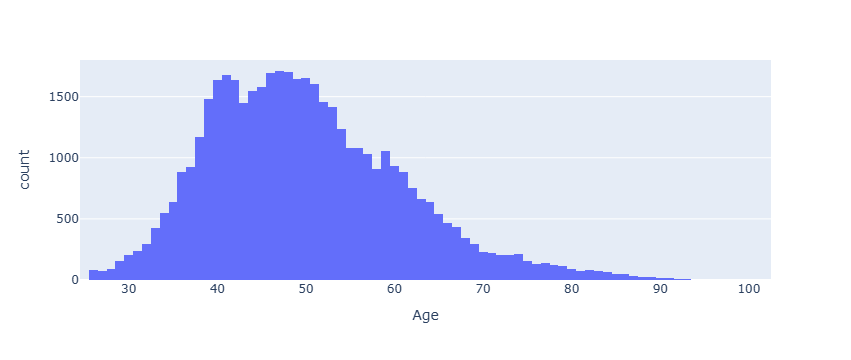

In [64]:
# 계약한 고객의 연령의 분포가 정규성을 따르는지 확인
# 시각화
px.histogram(df1, x = 'Age')

In [67]:
# 가설 수립
# 귀무 가설 : 해당 데이터의 분포는 정규성을 따른다.
# 대립 가설 : 해당 데이터의 분포는 정규성을 따르지 않는다.
stats.normaltest(df1['Age'].dropna()) # 검정하고자 하는 값(Series)에 결측값이 있다면, 결과가 결측값으로 나옴
# statistic : P.value를 계싼하기 위해 해당 데이터를 이용하여 분포 추정을 수행한 통계량
# pvalue : 귀무가설이 참일 확률을 0 ~ 1 값으로 표현
# P.value < 0.05 (유의수준), 대립가설 참(통계적 결론: 귀무가설 기각)
# 사실적 결론 : 해당 데이터의 분포는 정규성을 따르지 않는다.

NormaltestResult(statistic=np.float64(3081.8233512176084), pvalue=np.float64(0.0))

In [68]:
# 1표본 평균 검정(one sample T test)
df1['Amount_Month'].mean()

np.float64(93994.97428900021)

In [70]:
# 23년도에 목표 평균 월 랜탈 비용이 100000원이라고 가정할 때, 해당 월 랜탈 비용은 100000과 같다고 볼 수 있을까?
df1['year'] = pd.to_datetime(df1['Datetime']).dt.year
cond1 = df1['year'] == 2023
df1.loc[cond1]['Amount_Month'].mean()

np.float64(94179.04043203976)

In [72]:
# 가설 수립
# 귀무 가설 : 23년도 월랜탈비용의 평균은 10만원과 같다고 볼 수 있다.
# 대립 가설 : 23년도 원랜탈비용의 평균은 10만원과 다르다고 볼 수 있다.
stats.ttest_1samp(df1.loc[cond1]['Amount_Month'], 100000) # P.value < 0.05 대립가설 참(귀무가설 기각) -> 10만원과 다르다

TtestResult(statistic=np.float64(-38.42274955246107), pvalue=np.float64(2.913974690307771e-302), df=np.int64(10461))

- 1표본 평균 검정의 경우, 숫자 데이터가 정규성을 따를 때 사용이 가능한 기법